Part One: Scraping *Data*
**NOTE: If you are getting error's thrown, you may have to go back and replay a module before proceeding again**

1)

In [ ]:
#installing packages
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import re
from datetime import datetime

Requesting data from SpaceWeatherLive.com

In [ ]:
#headers are here incase of 403 status
headers = {'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405','From': 'pleaseletmein@gmail.com'}
r= requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html", headers=headers)
r

<Response [200]>

parsing the html with beautiful soup

In [ ]:
soup = bs(r.content,"html.parser")
soup.prettify()
s = soup.find("table", attrs={"class": "table table-striped"})

Creating a table from the html with Pandas

In [ ]:
tables = pd.read_html(str(s))
df =tables[0]
df.columns= ["Rank", "X:Class", "Date", "Region", "Start", "Maximum", "End", "Movie"]
df.index= np.arange(1,51)
df

,Rank,X:Class,Date,Region,Start,Maximum,End,Movie
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


2)


Drop the "movie" column

In [ ]:
df2 =df.drop('Movie', axis=1)
df2

,Rank,X:Class,Date,Region,Start,Maximum,End
1,1,X28+,2003/11/04,486,19:29,19:53,20:06
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
4,4,X17+,2005/09/07,808,17:17,17:40,18:03
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
6,6,X10,2003/10/29,486,20:37,20:49,21:01
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
9,9,X9,2006/12/05,930,10:18,10:35,10:45
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39


Iterating by row to create our date times

In [ ]:
#our lists
start = []
max = []
end= []
#going row by row to create the datetimes associated with that row
for index, row in df2.iterrows():
  date = row["Date"]
  s_time = row["Start"]
  m_time = row["Maximum"]
  e_time = row["End"]
  dt_s= date+" "+s_time+":00"
  dt_m= date+" "+m_time+":00"
  dt_e= date+" "+e_time+":00"
  start.append(datetime.strptime(dt_s, "%Y/%m/%d %H:%M:%S"))
  max.append(datetime.strptime(dt_m, "%Y/%m/%d %H:%M:%S"))
  end.append(datetime.strptime(dt_e, "%Y/%m/%d %H:%M:%S"))
#replacing the columns with their new datetimes
df2["Start"]=start
df2["Maximum"]=max
df2["End"]= end
#dropping the date column
df3=df2.drop('Date', axis=1)
#rearranging the columns
df3 = df3[["Rank","X:Class", "Start", "Maximum", "End", "Region"]]
df3.replace('-', pd.NA)
df3

,Rank,X:Class,Start,Maximum,End,Region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


3) Parsing Nasa data and putting it into a table

In [ ]:
#requesting the data from nasa
r = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html", headers=headers)
soup2 = bs(r.content,"html.parser")
soup2.prettify()
#regex
pattern = re.compile("(\d{4}/\d{2}/\d{2})\s+(\d{2}:\d{2})\s+(\d{2}/\d{2})\s+(\d{2}:\d{2})\s+(\d+)\s+(\d+)\s+(\w+)\s+(\w+|\-+)\s+((\w\d+.\d*)|\-+)\s+((\d|\-){2}\/(\d|\-){2})\s+((\d|\-){2}:(\d|\-){2})\s+((\w+)|\-)\s+((>?\d+)|\-+)\s+((\d|\-)+)\s+((\w|\-)+)")
#we convert our html into plaintext string
string = soup2.get_text()
#then we use our regex to find the fields we want
string2= re.findall(pattern,string)
#creating of lists to hold our data
string2[0]
start_date = []
start_time= []
end_date=[]
end_time=[]
s_freq=[]
e_freq=[]
location=[]
NOAA= []
imp= []
c_date= []
c_time= []
cpa=[]
c_width= []
c_spd= []
plots= []
#going through our data collection into our ordered lists
for row in string2:
  start_date.append(row[0])
  start_time.append(row[1])
  end_date.append(row[2])
  end_time.append(row[3])
  s_freq.append(row[4])
  e_freq.append(row[5])
  location.append(row[6])
  NOAA.append(row[7])
  imp.append(row[8])
  c_date.append(row[10])
  c_time.append(row[13])
  cpa.append(row[16])
  c_width.append(row[18])
  c_spd.append(row[20])
  plots.append(row[22])
#creating of our data frame
zipped= list(zip(start_date,start_time,end_date,end_time,s_freq,e_freq,location,NOAA,imp,c_date,c_time,cpa,c_width,c_spd,plots))
nasa_df= pd.DataFrame(zipped,columns = ['Start Date', 'Start Time', 'End Date','End Time', 'Start Frequency', 'End Frequency', 'Location', 'NOAA','X-Ray Importance','CME Date', 'CME Time', 'CPA', 'Width', 'Speed','Plot'])
nasa_df

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Location,NOAA,X-Ray Importance,CME Date,CME Time,CPA,Width,Speed,Plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX
486,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX
487,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX
488,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077,----


4) Tidying

In [ ]:
#replacing all missing entries as <NA>
pattern2 = re.compile("\-")
nasa_df2=nasa_df.replace(pattern2, pd.NA)
nasa_df2

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Location,NOAA,X-Ray Importance,CME Date,CME Time,CPA,Width,Speed,Plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,<NA>,<NA>,09/17,12:00,Halo,360,1385,PHTX
486,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,<NA>,<NA>,10/18,08:00,85,146,1001,PHTX
487,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX
488,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,<NA>,M4.4,11/29,13:25,Halo,360,2077,<NA>


Creating Datetimes, rearranging columns, and adding the new Halo and lower bound columns

In [ ]:
from pandas.core.arrays.interval import NA
#lists to combine datetimes
start=[]
end=[]
cme=[]
#going row by row
for index, row in nasa_df2.iterrows():
  #getting the year
  year= row["Start Date"][:4]
  #checks to see if the time is 24:00, if it is, we convert to 00:00
  if row['Start Time'][:2]=='24':
    sdt= row['Start Date']+' 00:'+row['Start Time'][3:]+':00'
  else:
    sdt= row['Start Date']+' '+row['Start Time']+':00'
  if row['End Time'][:2]=='24':
    edt= year+'/'+row['End Date']+' 00:'+row['End Time'][3:]+':00'
  else:
    edt= year+'/'+row['End Date']+' '+row['End Time']+':00'
  start.append(datetime.strptime(sdt, "%Y/%m/%d %H:%M:%S"))
  end.append(datetime.strptime(edt, "%Y/%m/%d %H:%M:%S")) 
  #checks to see if our CME data is null
  if(pd.isna(row['CME Date']) or pd.isna(row['CME Time'])):
    cme.append(pd.NA)
  else:
    if row['CME Time'][:2]=='24':
      cdt= year+'/'+row['CME Date']+' 00:'+row['CME Time'][3:]+':00'
    else:
      cdt= year+'/'+row['CME Date']+' '+row['CME Time']+':00'
    cme.append(datetime.strptime(cdt, "%Y/%m/%d %H:%M:%S")) 
#adding new columns
nasa_df2['Start Datetime']=start
nasa_df2['End Datetime']= end
nasa_df2['CME Datetime']=cme
#dropping old ones
nasa_df3= nasa_df2.drop(['Start Date','Start Time', 'End Date', 'End Time', 'CME Date', 'CME Time'],axis=1)
#rearranging the columns
nasa_df3= nasa_df3[['Start Datetime', 'Start Frequency', 'End Datetime', 'End Frequency', 'Location', 'NOAA', 'X-Ray Importance', 'CME Datetime', 'CPA', 'Width', 'Speed', 'Plot']]
nasa_df3


,Start Datetime,Start Frequency,End Datetime,End Frequency,Location,NOAA,X-Ray Importance,CME Datetime,CPA,Width,Speed,Plot
0,1997-04-01 14:00:00,8000,1997-04-01 14:15:00,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX
1,1997-04-07 14:30:00,11000,1997-04-07 17:30:00,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,Halo,360,878,PHTX
2,1997-05-12 05:15:00,12000,1997-05-14 16:00:00,80,N21W08,8038,C1.3,1997-05-12 05:30:00,Halo,360,464,PHTX
3,1997-05-21 20:20:00,5000,1997-05-21 22:00:00,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX
4,1997-09-23 21:53:00,6000,1997-09-23 22:16:00,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017-09-17 11:45:00,16000,2017-09-17 12:35:00,900,S08E170,<NA>,<NA>,2017-09-17 12:00:00,Halo,360,1385,PHTX
486,2017-10-18 05:48:00,16000,2017-10-18 12:40:00,400,S06E123,<NA>,<NA>,2017-10-18 08:00:00,85,146,1001,PHTX
487,2019-05-03 23:52:00,13000,2019-05-04 00:16:00,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX
488,2020-11-29 13:07:00,14000,2020-11-29 15:23:00,850,S23E89,<NA>,M4.4,2020-11-29 13:25:00,Halo,360,2077,<NA>


In [ ]:
#lists to check for halos and lower bound
hasHalo= []
lowerBound =[]
#iterating by row
for index, row in nasa_df3.iterrows():
  #checks for halos
  if row['CPA']== 'Halo':
    hasHalo.append(True)
  else: 
    hasHalo.append(False)
  #checks for lowerbound and removes >
  if('>' in row['Width']):
    row['Width']=row['Width'][1:]
    lowerBound.append(True)
  else:
    lowerBound.append(False)
#add the columns
nasa_df3['Halo?']=hasHalo
nasa_df3['Lower Bound?']=lowerBound
#replace halo with NA
pattern3 = re.compile("Halo")
nasa_df4=nasa_df3.replace(pattern3, pd.NA)
nasa_df4

,Start Datetime,Start Frequency,End Datetime,End Frequency,Location,NOAA,X-Ray Importance,CME Datetime,CPA,Width,Speed,Plot,Halo?,Lower Bound?
0,1997-04-01 14:00:00,8000,1997-04-01 14:15:00,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,11000,1997-04-07 17:30:00,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,<NA>,360,878,PHTX,True,False
2,1997-05-12 05:15:00,12000,1997-05-14 16:00:00,80,N21W08,8038,C1.3,1997-05-12 05:30:00,<NA>,360,464,PHTX,True,False
3,1997-05-21 20:20:00,5000,1997-05-21 22:00:00,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,6000,1997-09-23 22:16:00,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017-09-17 11:45:00,16000,2017-09-17 12:35:00,900,S08E170,<NA>,<NA>,2017-09-17 12:00:00,<NA>,360,1385,PHTX,True,False
486,2017-10-18 05:48:00,16000,2017-10-18 12:40:00,400,S06E123,<NA>,<NA>,2017-10-18 08:00:00,85,146,1001,PHTX,False,False
487,2019-05-03 23:52:00,13000,2019-05-04 00:16:00,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,False,False
488,2020-11-29 13:07:00,14000,2020-11-29 15:23:00,850,S23E89,<NA>,M4.4,2020-11-29 13:25:00,<NA>,360,2077,<NA>,True,False


**Part 2: Analysis**

Question 1) Replication

Creating a new table that will show only the top 50 strongest solar flares from our NASA table

In [ ]:
#(B, C, M, and X classes, with X being the most intense)
pattern5 = re.compile('(\w)(\d+.\d*)') #regex to extract the letter class and its value
comparison = []
#we will quantify the letters and id in the x-class to rank them
for index, row in nasa_df4.iterrows():
  if pd.isna(row['X-Ray Importance']):
    comparison.append(0.0)
  else:
    fields = re.findall(pattern5,row['X-Ray Importance'])
    letter = fields[0][0]
    if letter == 'B':
      value=100.0
    elif letter == 'C':
      value = 200.0
    elif letter == 'M':
      value = 300.0
    else:
      value = 400.0
    value+=float(fields[0][1])
    comparison.append(value)

nasa_top = nasa_df4
#adding our values
nasa_top['Values']=comparison
#reordering the rows by our values to get the strongest stars
nasa_top.sort_values(by=['Values'], ascending= False, inplace=True)
#dropping the values as we no longer need it
nasa_top50 = nasa_top.drop('Values', axis=1)
#adding ranks
rank = np.arange(1,51)
#only showing top 50
nasa_top50=nasa_top50.head(50)
nasa_top50['Rank']=rank
#reordering the columns
nasa_top50 = nasa_top50[['Rank', 'X-Ray Importance',  'Start Datetime', 'CME Datetime', 'End Datetime','Location']]
nasa_top50


,Rank,X-Ray Importance,Start Datetime,CME Datetime,End Datetime,Location
233,1,X28.,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,S19W83
115,2,X20.,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,N19W72
226,3,X17.,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,S16E08
124,4,X14.,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,S20W85
227,5,X10.,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,S15W02
8,6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,S18W63
482,7,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,S08W33
483,8,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,S09W92
230,9,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,S14W56
273,10,X7.1,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,N14W61


We can get pretty close to the table shown in https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html. However some differences we have is that our locations/regions use difference coordinate formats, with NASA using cardinal directions in theirs while the website uses region numbers. Additionally the website only has one column for dates and three for times, while ours has multiple datetime columns as the star may end on a different day than the date it started to flare. A final note is that some entries from SpaceWeather cannot be found in the NASA table. Below is the original, unedited spaceweather table for comparision:

In [ ]:
df

,Rank,X:Class,Date,Region,Start,Maximum,End,Movie
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Question 2) Integration


Our function/equation that will determine and find the best matching row from nasa compared to a row from space weather. We are quantifying similarity by using a sequence matcher which will give us a value from 0-1 that shows us how similar the two rows are. We will use this to obtain values from the fields that can be compared (the Datetimes and X-Class) and then sum them together to get a quantifiable similarity value. It returns a tuple that holds the row most similar, and a boolean that determines if that row is probably in the Spaceweather table.

In [ ]:
from difflib import SequenceMatcher
def comparison(row,df):
  #we get a row and then go through the df to find a row that is most similar 
  #we can determine similarity by quantifying fields and finding the row with the most amount of similarity
  #If the similarity is greater than 3, then we can sure that the star the row measured is the same one measured by the row passed in

  temp = {} #holds our current most similar map to our parameter
  temp_val= 0 #holds our current similarity
  for index, row2 in df.iterrows():
    try:
      value = 0
      a= row['Start']
      b= row2['Start Datetime']
      value += SequenceMatcher(None, str(a), str(b)).ratio()
      a= row['End']
      b= row2['End Datetime']
      value += SequenceMatcher(None, str(a), str(b)).ratio()
      a= row['Maximum']
      b= row2['CME Datetime']
      value += SequenceMatcher(None, str(a), str(b)).ratio()
      a= row['X:Class']
      b= row2['X-Ray Importance']
      value += SequenceMatcher(None, a, b).ratio()
      #as long as the sum is above 3.2, there is enough similarity to suspect it appeared the other table
      # I determined this number by matching the rows by hand, and trying to find the largest lower limit that would satisfy the rows I confirmed to be in the other table
      if value > 3.22:
        #chances are high that this star was measured in space weather
        return (row2,True)
      elif value > temp_val:
        temp = row2
        temp_val=value

    except:
      continue
  #returns the best matching row possible
  return (temp,False)

Creation of table from the Nasa dataset that best matches the table from spaceweather

In [ ]:
#lists to create our new dataframe
similar_list = []
rank_similar = []
#goes through each row in the space weather dataframe to find its best matching row
for index, row in df3.iterrows():
  similar = comparison(row,nasa_top)
  similar_list.append(similar[0])
  if similar[1] :
    #if we figure out that this row may have appeared in the other table
    #we assign its corresponding rank value
    rank_similar.append(row["Rank"])
  else:
    rank_similar.append(pd.NA)
#creation of the dataframe
similar_df = pd.DataFrame(similar_list)
#adding the column that will shows the rank if the row appeared in the other table
similar_df["Rank if appears in data?"]=rank_similar
similar_df


,Start Datetime,Start Frequency,End Datetime,End Frequency,Location,NOAA,X-Ray Importance,CME Datetime,CPA,Width,Speed,Plot,Halo?,Lower Bound?,Values,Rank if appears in data?
233,2003-11-04 20:00:00,10000,2003-11-04 00:00:00,200,S19W83,10486,X28.,2003-11-04 19:54:00,<NA>,360,2657,PHTX,True,False,428.0,1
115,2001-04-02 22:05:00,14000,2001-04-03 02:30:00,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,420.0,2
226,2003-10-28 11:10:00,14000,2003-10-29 00:00:00,40,S16E08,10486,X17.,2003-10-28 11:30:00,<NA>,360,2459,PHTX,True,False,417.0,3
267,2005-01-01 00:45:00,14000,2005-01-01 02:25:00,450,N06E34,10715,X1.7,2005-01-01 00:54:00,<NA>,360,832,PHTX,True,False,401.7,<NA>
124,2001-04-15 14:05:00,14000,2001-04-16 13:00:00,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,414.0,5
227,2003-10-29 20:55:00,11000,2003-10-29 00:00:00,500,S15W02,10486,X10.,2003-10-29 20:54:00,<NA>,360,2029,PHTX,True,False,410.0,6
8,1997-11-06 12:20:00,14000,1997-11-07 08:30:00,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,PHTX,True,False,409.4,7
482,2017-09-06 12:05:00,16000,2017-09-07 08:00:00,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,PHTX,True,False,409.3,8
232,2003-11-03 10:00:00,6000,2003-11-03 12:30:00,400,N08W77,10488,X3.9,2003-11-03 10:06:00,293,103,1420,PHTX,False,False,403.9,<NA>
230,2003-11-02 17:30:00,12000,2003-11-03 01:00:00,250,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598,PHTX,True,False,408.3,10


With this table we are able to gather additional infomation about the stars in the Spaceweather table that were not originally measured by the website.

Question 3) Analysis

I will plot the occurences of halo stars in the top 50 and the rest of the data. We will see the relationship between halo stars and whether or not that affects the strength of its solar flares. I will be plotting a bar graph that will show the percentage of halo stars in relation to the total percentage and percentage of non halo stars for the top50 set and 'all data' set

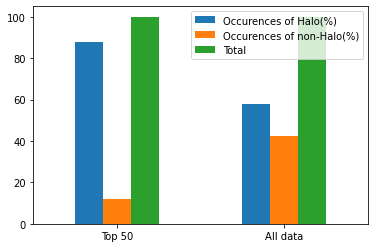

In [ ]:
import matplotlib.pyplot as plt
#count the occurances of halos in top50 and normal dataframe
#calcualte the percentage of halo in comparision to the total data for both data frames
#plot is as a bar plot
total_rows=0
total_halo=0
#Counting the number of halo occurrences in the set of all stars
for index, row in nasa_top.iterrows():
  if row['Halo?'] == True:
    total_halo+=1
  total_rows+=1

top_halo=0
#counting the number of halo occurences in the ranking of the top 50
for index, row in nasa_top.head(50).iterrows():
  if row['Halo?'] == True:
    top_halo+=1
top_halo
#calculating the percentage/proportion
total_percent_halo = total_halo/total_rows
total_percent_nhalo = 1 - total_percent_halo

top_percent_halo = top_halo/50
top_percent_nhalo = 1 - top_percent_halo

total_percent_halo*=100
top_percent_halo*=100
total_percent_nhalo*=100
top_percent_nhalo*=100
#creating the lists to be used in a dataframe that will plot our barplot
halo = [top_percent_halo,total_percent_halo]
nhalo= [top_percent_nhalo, total_percent_nhalo]
total= [100.0, 100.0]
haloplot = pd.DataFrame({'Occurences of Halo(%)': halo,
                   'Occurences of non-Halo(%)': nhalo, 'Total': total}, index=['Top 50', 'All data'])
ax = haloplot.plot.bar(rot=0)
ax

The Bar in blue represents the percentage of stars thare are halo, while the orange represents the percent of stars that are non-halo. The green bar represents the entire dataset respectively and is there to show proportion of the blue and orange to the rest of the dataset

As you can see, most of the stars that rank in the top 50 are halo stars. They make up the majority being composed of nearly 85% of the stars in the ranking. Compared to the data set of all stars however, halo stars only make up a little under 60% of stars in the set. This suggests a correlation between that are halo vs stars that have strong solar flares.